### *Required Libraries*

In [72]:
import pandas as pd
import ydata_profiling as pf # this library was known as pandas_profiling but it was deprecited 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import plotly
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
import pickle

import warnings
warnings.filterwarnings('ignore')

### *Load Dataset*

In [2]:
data=pd.read_csv("E:\Data Science\Datasets\Zomato.csv")
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## *Columns Description*

1. ***url*** *contains the urkl of the restaurant in the zomato website*
2. ***address*** *contains the address of the restaurant in Bengaluru*
3. ***name*** *contains the name of the dataset*
4. ***online_order*** *whether online ordering is available in the restaurant or not*
5. ***book_table*** *table book option available or not*
6. ***rate*** *contains the overall rating of the restaurant our of 5*
7. ***votes*** *contains total number of rating of the restaurant as of the above mentioned data*
8. ***phone*** *contains the phone number of the restaurant* 
9. ***location*** *contains the neighborhood in which the restaurant is located* 
10. ***rest_type*** *restaurant type* 
11. ***dish_liked*** *dishes people liked in the restaurant* 
12. ***cuisines*** *food styles , separated by comma* 
13. ***approx_cost*** *( for two people ) contains the approximate cost for meal for two people* 
14. ***reviews_list*** *list of tuples containing reviews for the restaurant , each tuple* 
15. ***menu_item*** *contains list of menus available in the restaurant* 
16. ***listed_in( type )*** *type of meal* 
17. ***listed_in( city )*** *contains the neighborhood in which the restaurant is listed*

In [3]:
data.shape

(51717, 17)

In [4]:
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [5]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

### *Overall Overview Of Dataset*

In [6]:
# pf.ProfileReport(data)

### *Deleting Unnecessary Columns*

In [7]:
data=data.drop(['url','phone'],axis=1)

### *Checking Duplicate Values*

In [8]:
data.duplicated().sum()

43

In [9]:
data.drop_duplicates(inplace=True)

### *Dropping Null Values*

In [10]:
data.dropna(how='any',inplace=True)
data.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

### *Renaming The Columns*

In [11]:
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [12]:
data=data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type', 'listed_in(city)':'city'})
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

### *Cleaning The Dataset*

In [13]:
data['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

### *Converting The Result In Float Type*

In [14]:
data['cost']=data['cost'].apply(lambda x: x.replace(',',''))
data['cost']=data['cost'].astype(float)

In [15]:
print(data['cost'].unique())
data.dtypes

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  750.  200.  850.
 1200.  150.  350.  250. 1500. 1300. 1000.  100.  900. 1100. 1600.  950.
  230. 1700. 1400. 1350. 2200. 2000. 1800. 1900.  180.  330. 2500. 2100.
 3000. 2800. 3400.   40. 1250. 3500. 4000. 2400. 1450. 3200. 6000. 1050.
 4100. 2300.  120. 2600. 5000. 3700. 1650. 2700. 4500.]


address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

### *Reading Unique Values from the Rate Columns*

In [16]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [17]:
data=data[data['rate']!='NEW']

In [18]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [19]:
data['rate']=data['rate'].apply(lambda x : x.replace('/5',''))

In [20]:
data['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

## *Visualization*

### *Most Famous Restaurant Chains In Bangaluru*

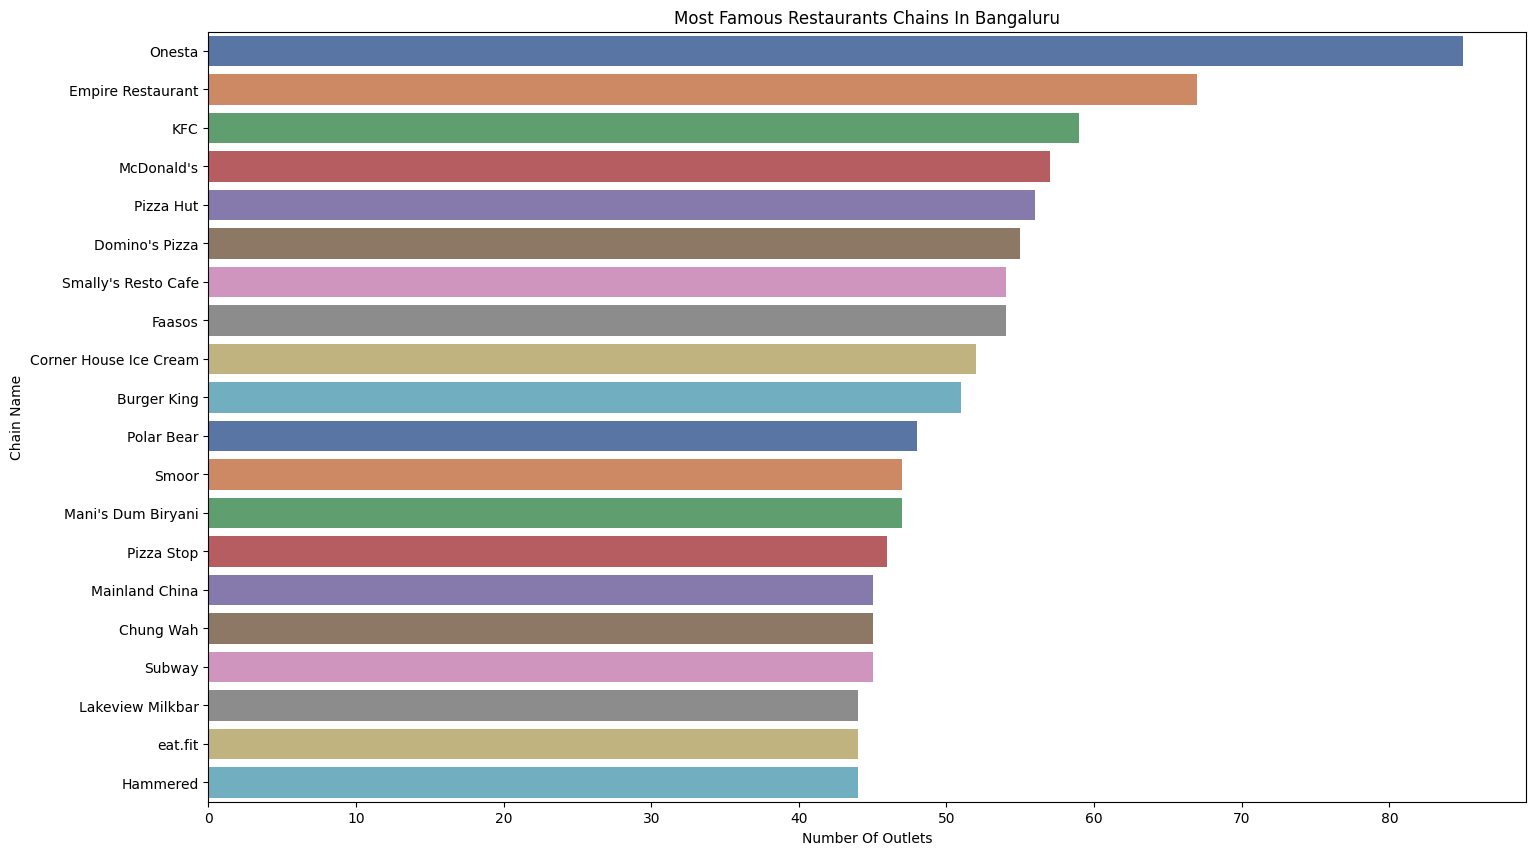

In [21]:
plt.figure(figsize=(17,10))
chains=data['name'].value_counts()[:20]
sns.barplot(x=chains.values,y=chains.index,palette='deep')
plt.title("Most Famous Restaurants Chains In Bangaluru")
plt.xlabel("Number Of Outlets")
plt.ylabel("Chain Name")
plt.show()

### *Whether Restaurant Offer Table Booking Or Not*

In [22]:
x=data['book_table'].value_counts()
colors=['#FF0000','#0000FF']
trace=go.Pie(labels=x.index,values=x,textinfo='value',marker=dict(colors=colors,line=dict(color='#000000',width=2)))
layout=go.Layout(title='Table Booking',width=600,height=600)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig,filename='pie_chart_subplots')

### *Whether Restaurant Deliver Online Or Not*

In [23]:
# data['online_order']=data['online_order'].replace({'Yes':1,'No':0})

In [24]:
data['online_order'].value_counts()

online_order
Yes    16378
No      6870
Name: count, dtype: int64

In [25]:
x=data['online_order'].value_counts().index
x

Index(['Yes', 'No'], dtype='object', name='online_order')

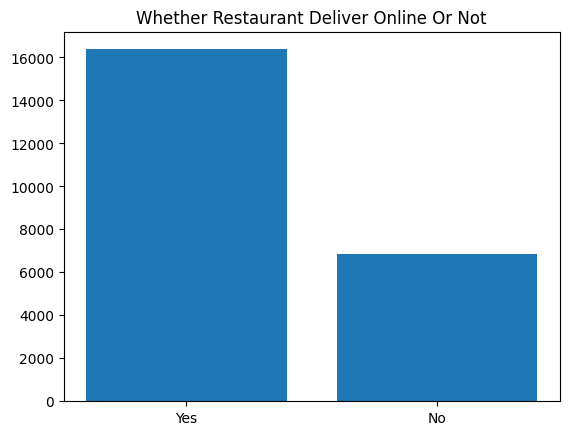

In [26]:
x=data['online_order'].value_counts().index
y=data['online_order'].value_counts().values
plt.bar(x,y)
plt.title('Whether Restaurant Deliver Online Or Not')
plt.show()

<Axes: xlabel='rate', ylabel='Count'>

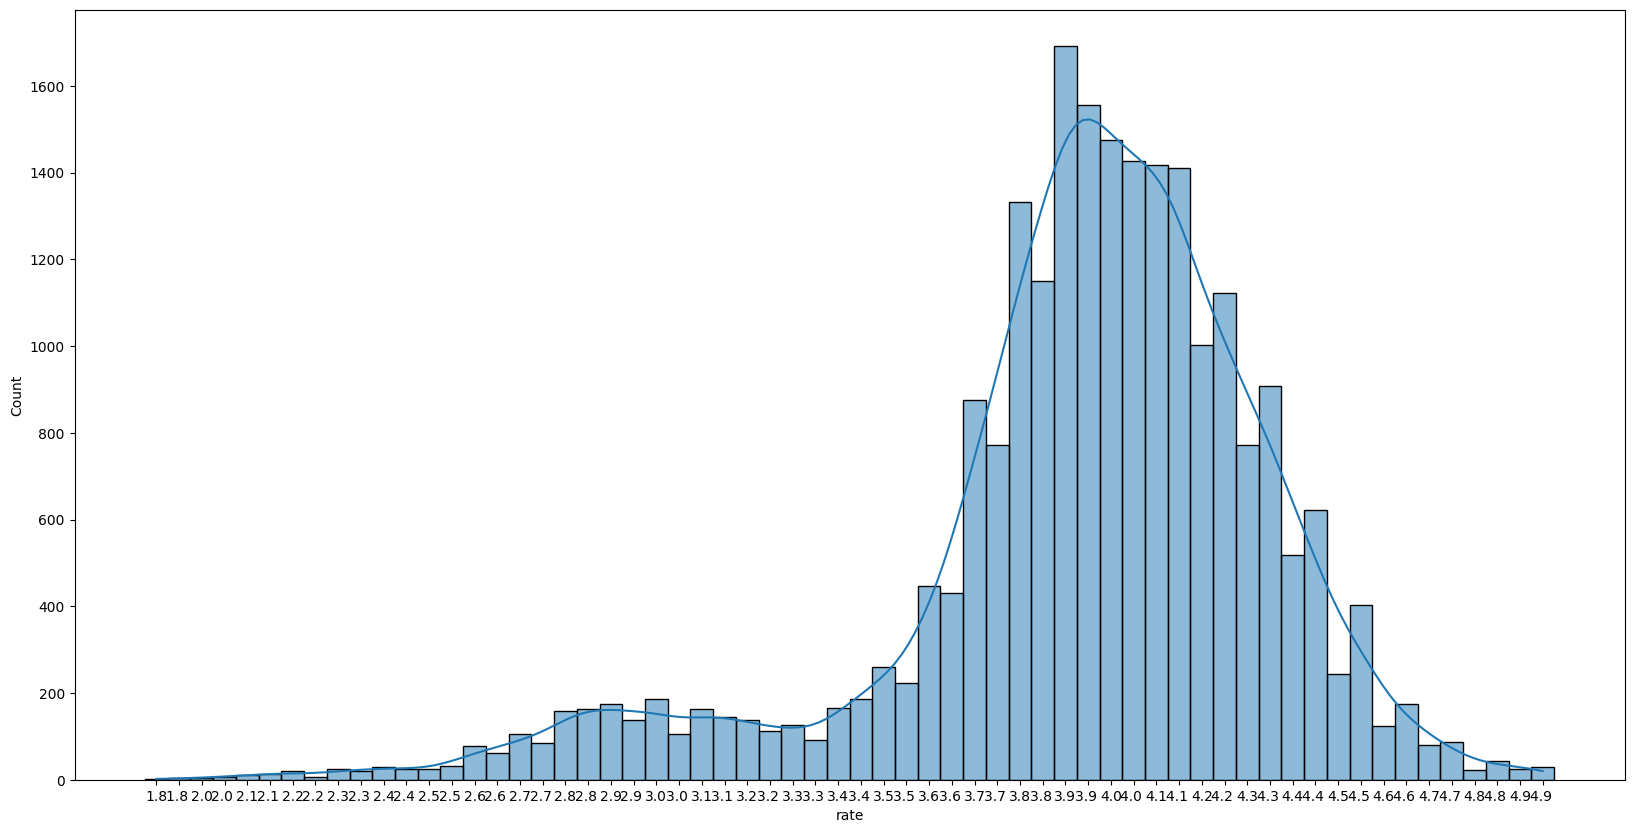

In [27]:
plt.figure(figsize=(20,10))
sns.histplot(data['rate'].sort_values(ascending=True),bins=17,kde=True)

In [28]:
data['rate']=data['rate'].astype(float)
data['rate'].dtype

dtype('float64')

In [29]:
data['rate'].min()
data['rate'].max()

4.9

### *Plotting The Counts with Pie Chart*

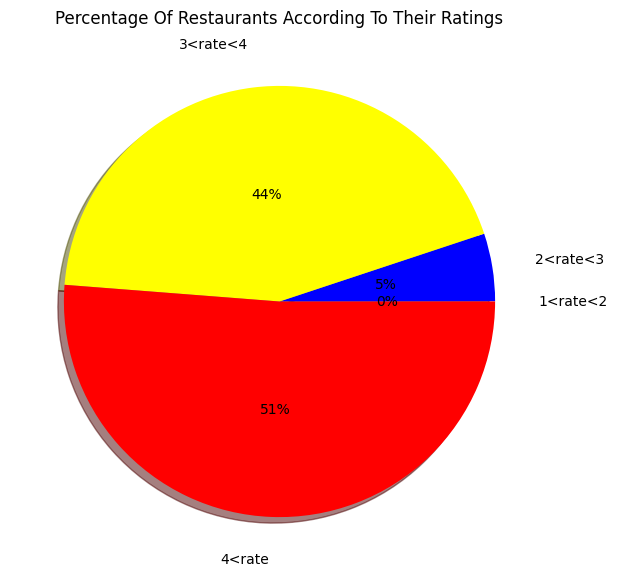

In [30]:
slices=[((data['rate']>=1)&(data['rate']<2)).sum(),
        ((data['rate']>=2)&(data['rate']<3)).sum(),
        ((data['rate']>=3)&(data['rate']<4)).sum(),
        (data['rate']>=4).sum()
        ]
labels=['1<rate<2','2<rate<3','3<rate<4','4<rate']
colors=['red','blue','yellow']
plt.figure(figsize=(7,7))
plt.pie(slices,colors=colors,labels=labels,autopct='%1.0f%%',pctdistance=0.5,labeldistance=1.2,shadow=True)
plt.title( 'Percentage Of Restaurants According To Their Ratings')
plt.show()

### *Service Types*

In [31]:
data['type'].value_counts().index

Index(['Delivery', 'Dine-out', 'Desserts', 'Cafes', 'Drinks & nightlife',
       'Buffet', 'Pubs and bars'],
      dtype='object', name='type')

Text(0.5, 1.0, 'Types Of Services')

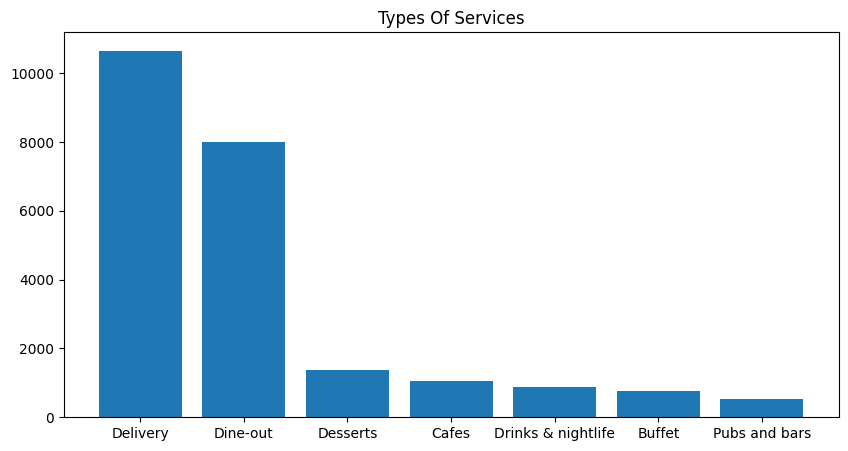

In [32]:
plt.figure(figsize=(10,5))
plt.bar(data['type'].value_counts().index,data['type'].value_counts().values)
plt.title('Types Of Services')

### *Approximate Cost*

In [33]:
plotly.boxplot_frame(data['cost'])

### *Most Liked Dishes*

In [34]:
data.index=range(data.shape[0])
likes=[]
for i in range(data.shape[0]):
    array_split=re.split(',',data['dish_liked'][i])
    for item in array_split:
        likes.append(item)

In [35]:
data.index=range(data.shape[0])
data.index

RangeIndex(start=0, stop=23248, step=1)

In [36]:
print('Most Liked Dishes In Bangaluru')
favorite=pd.Series(likes).value_counts()
favorite.head(10)

Most Liked Dishes In Bangaluru


 Pasta         2692
 Pizza         1915
 Cocktails     1880
 Burgers       1736
 Mocktails     1623
 Biryani       1307
 Sandwiches    1287
Burgers        1256
 Coffee        1184
 Nachos        1170
Name: count, dtype: int64

### *Restaurant and their count*

Text(0.5, 1.0, 'Restaurant Type')

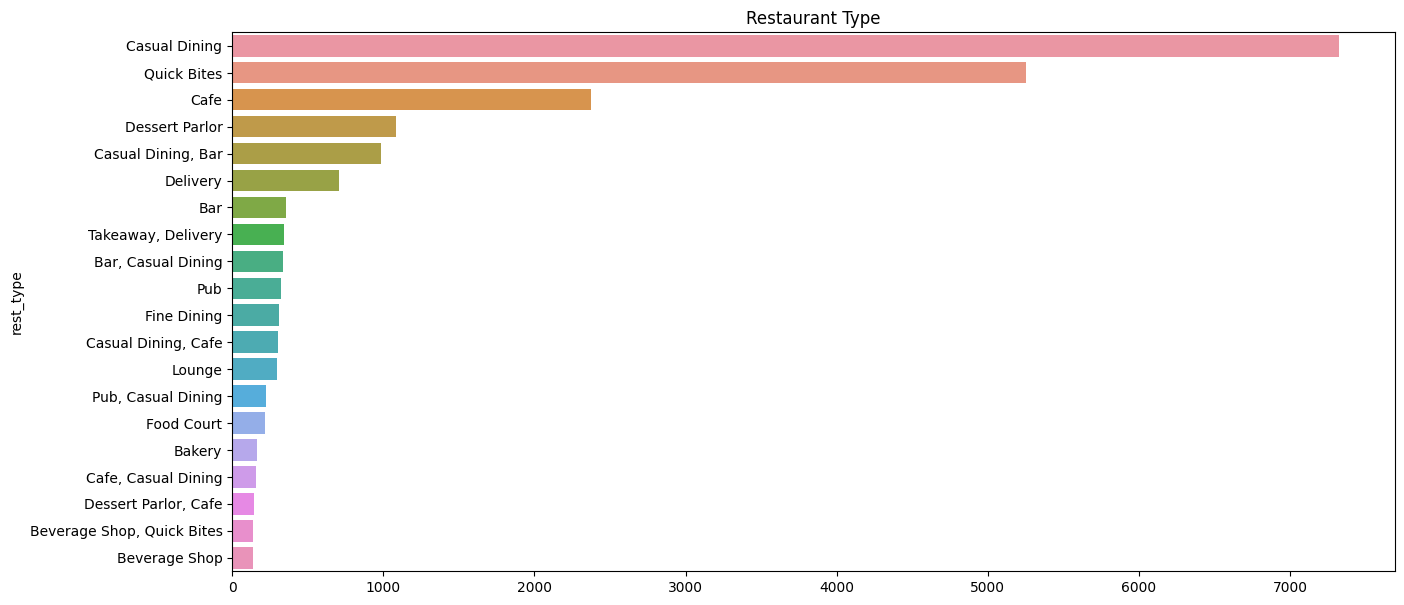

In [37]:
plt.figure(figsize=(15,7))
rest=data['rest_type'].value_counts()[:20]
sns.barplot(x=rest.values,y=rest.index)
plt.title('Restaurant Type')

### *Building Our Model*

In [42]:
data["online_order"][data['online_order']=='Yes']=1
data["online_order"][data['online_order']=='No']=0

In [43]:
data.online_order.value_counts()

online_order
1    16378
0     6870
Name: count, dtype: int64

In [44]:
data['online_order']=pd.to_numeric(data['online_order'])

In [45]:
data["book_table"][data['book_table']=='Yes']=1
data["book_table"][data['book_table']=='No']=0

In [48]:
data['book_table'].value_counts()

book_table
0    17191
1     6057
Name: count, dtype: int64

In [49]:
data['book_table']=pd.to_numeric(data['book_table'])

> *Label Encoding*

In [52]:
le=LabelEncoder()
data['location']=le.fit_transform(data['location'])
data['rest_type']=le.fit_transform(data['rest_type'])
data['cuisines']=le.fit_transform(data['cuisines'])
data['menu_item']=le.fit_transform(data['menu_item'])

In [53]:
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5047,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",5047,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5047,Buffet,Banashankari


In [55]:
my_data=data.iloc[:,[2,3,4,5,6,9,10,12]]
my_data.to_csv('zomato_data.csv')

In [56]:
x=data.iloc[:,[2,3,4,5,6,9,10,12]]
x.head()

,online_order,book_table,rate,votes,location,cuisines,cost,menu_item
0,1,1,4.1,775,1,1386,800.0,5047
1,1,0,4.1,787,1,594,800.0,5047
2,1,0,3.8,918,1,484,800.0,5047
3,0,0,3.7,88,1,1587,300.0,5047
4,0,0,3.8,166,4,1406,600.0,5047


In [57]:
y=data['rate']
y.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

### *Linear Regression Model*

In [61]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [63]:
y_pred=lr_model.predict(x_test)
r2_score(y_test,y_pred)

1.0

### *Random Forest Model*

In [67]:
rf_model=RandomForestRegressor(n_estimators=650,random_state=3,min_samples_leaf=0.0001)
rf_model.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=0.0001, n_estimators=650, random_state=3)

In [68]:
y_pred=rf_model.predict(x_test)
r2_score(y_test,y_pred)

0.9999998355550552

### *Extra Tree Model*

In [70]:
et_model=ExtraTreesRegressor(n_estimators=120)
et_model.fit(x_train,y_train)

ExtraTreesRegressor(n_estimators=120)

In [71]:
y_pred=et_model.predict(x_test)
r2_score(y_test,y_pred)

0.9999998956705458

### *Saving Our Model*

In [73]:
pickle.dump(et_model,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))